In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\Coordcontrol1_P2_7_17_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\video_time\control1_P2_7_17_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\Control\stimulus_time\control1_P2_7_17_24_stimulus_time0.csv'

north_pixel = 109
south_pixel = 429
east_pixel = 489
west_pixel = 148
shelter_x_pixel = 329
shelter_y_pixel = 407

#estimate for when mouse reaches shelter
escape_done = 5 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 2)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
10132,10132,10132,-5.999902,-30.201282,0.000500,-6.549754,-30.815691,0.000027,-30.472109,-3.063735,...,-11.653068,-29.256324,0.000227,2.471879,-29.587126,0.000013,-31.292184,0.709434,0.000994,25.415833
10133,10133,10133,-5.999902,-30.201282,0.000268,-6.549754,-30.815691,0.000023,-30.456016,-2.985389,...,-11.653068,-29.256324,0.000176,2.471879,-29.587126,0.000009,-31.304742,0.713197,0.001238,25.455539
10134,10134,10134,-5.999902,-30.201282,0.000328,-6.549754,-30.815691,0.000028,-30.455279,-2.985389,...,-11.653068,-29.256324,0.000215,2.455949,-29.618876,0.000012,-31.304742,0.713197,0.001053,25.495513
10135,10135,10135,-5.999902,-30.201282,0.000297,-6.549754,-30.815691,0.000017,-30.455279,-3.063735,...,-11.653068,-29.256324,0.000207,0.880600,-31.112558,0.000012,-31.334263,0.713197,0.001136,25.535513
10136,10136,10136,-5.999902,-30.201282,0.000682,-6.549754,-30.815691,0.000016,-30.455279,-3.254645,...,-11.653068,-29.256324,0.000341,0.584446,-31.122033,0.000031,-31.426997,-1.275305,0.000793,25.576345


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
long_range

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9322,9322,9322,30.673224,2.445531,0.001030,31.868452,4.243413,0.951920,32.038145,4.788453,...,0.999104,26.567677,6.621473,0.999933,-6.992602,35.122380,0.221979,0.008882,1.618355,0.372583
9323,9323,9323,30.673786,2.409246,0.001966,31.813156,4.055383,0.939545,32.038145,4.604424,...,0.999272,26.567677,6.621473,0.999905,-6.951911,35.133765,0.490722,0.019968,1.604565,-0.338894
9324,9324,9324,30.674348,2.372962,0.006982,31.813156,3.677280,0.966880,32.038145,4.266444,...,0.999206,26.588755,6.616383,0.999881,-6.911514,35.216833,3.333309,0.134656,1.500332,-2.580214
9325,9325,9325,30.674911,2.336678,0.011403,31.813156,3.494951,0.987369,32.027264,4.073341,...,0.999119,26.653206,6.611508,0.999917,-6.872192,35.301336,3.727277,0.146564,1.445275,-1.400153
9326,9326,9326,30.675473,2.300394,0.015119,31.813156,3.342575,0.988355,32.047775,3.896771,...,0.999039,26.728389,6.512728,0.999936,-6.832602,35.409726,4.156544,0.164558,1.395984,-1.245037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,9842,9842,-24.147303,12.414414,0.000289,-25.935275,16.995217,0.000961,-27.550748,20.748735,...,0.885754,-22.583478,15.314381,0.998069,13.812876,27.804982,0.744921,0.029644,1.521703,0.419523
9843,9843,9843,-24.180632,12.370336,0.000294,-25.900721,16.998550,0.000497,-27.550748,20.748735,...,0.515636,-22.583478,15.314381,0.995263,13.852595,27.783649,0.746347,0.029644,1.538269,0.417077
9844,9844,9844,-24.213960,12.326258,0.000355,-25.866167,17.001882,0.000973,-26.647899,20.550565,...,0.945521,-22.465716,15.337209,0.999471,13.892608,27.762332,0.740863,0.029644,1.554699,0.410613
9845,9845,9845,-24.247289,12.282180,0.000469,-25.831613,17.005214,0.000315,-26.641829,20.319986,...,0.235751,-22.217144,15.360973,0.997181,13.932672,27.741030,0.739920,0.029644,1.570986,0.406529


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

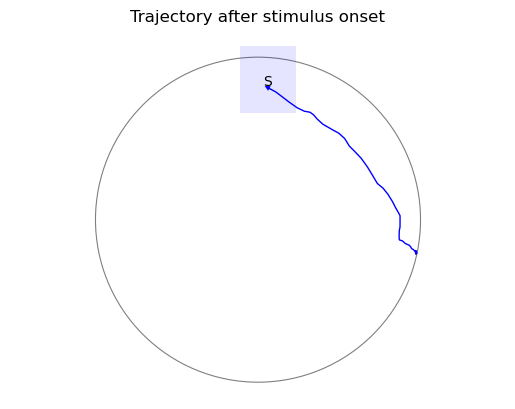

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_only)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

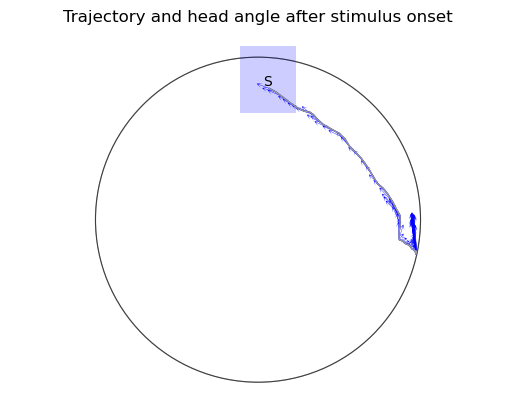

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_only)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9497,9497,9497,30.771621,-3.904202,0.000416,31.148122,-7.603292,0.972163,31.869113,-7.317794,...,0.999586,27.524214,-3.109596,0.999601,0.011276,42.607289,0.000000,0.000000,0.610660,-0.023842
9498,9498,9498,30.772183,-3.940487,0.000328,31.238635,-7.584999,0.977376,31.930086,-7.304551,...,0.999417,27.507165,-3.189356,0.999347,0.049497,42.613562,1.049036,0.040095,0.586592,-0.629704
9499,9499,9499,30.772746,-3.976771,0.000684,31.238635,-7.563879,0.979894,31.960008,-7.253837,...,0.999090,27.507165,-3.189356,0.999173,0.089152,42.614001,0.016933,0.000671,0.585040,-0.039137
9500,9500,9500,30.773308,-4.013055,0.000572,31.238635,-7.563879,0.991919,31.960008,-7.253837,...,0.999538,27.507165,-3.189356,0.999533,0.129164,42.612939,0.035039,0.001402,0.583891,-0.028723
9501,9501,9501,30.773870,-4.049339,0.000322,31.230533,-7.563879,0.985438,31.960008,-7.223063,...,0.999229,27.503191,-2.806375,0.999049,0.169177,42.517123,3.149441,0.126019,0.584848,0.023916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,9567,9567,3.355394,24.042782,0.999145,4.709390,23.228670,0.999938,4.130916,22.564525,...,0.999941,10.771232,19.061290,0.999975,2.809804,7.618628,37.150893,1.486482,0.285741,0.277748
9568,9568,9568,2.280470,24.882153,0.997993,3.328398,24.317050,0.999966,2.731598,23.681945,...,0.999938,9.309603,20.106871,0.999989,2.849804,5.816554,45.789318,1.831573,0.446322,4.014538
9569,9569,9569,0.591199,25.971400,0.998642,1.930854,25.362613,0.999968,1.457824,24.727177,...,0.999924,7.881351,21.558700,0.999973,2.890700,4.108236,42.579059,1.741313,1.088623,15.705721
9570,9570,9570,-0.618883,26.554275,0.996661,0.649651,26.198128,0.999990,0.191595,25.428955,...,0.999957,6.474352,22.017775,0.999961,2.930137,2.722395,36.817502,1.451972,2.780108,42.890817


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

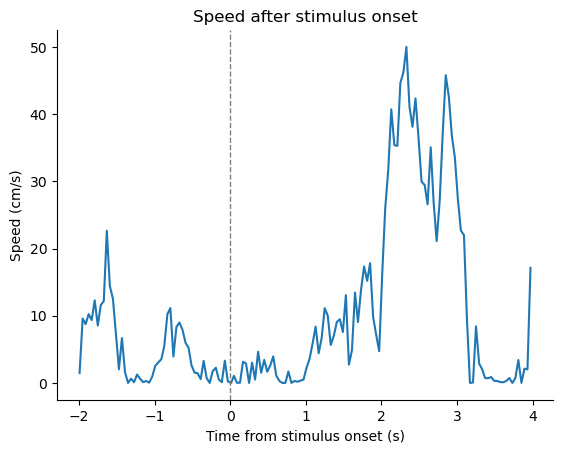

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

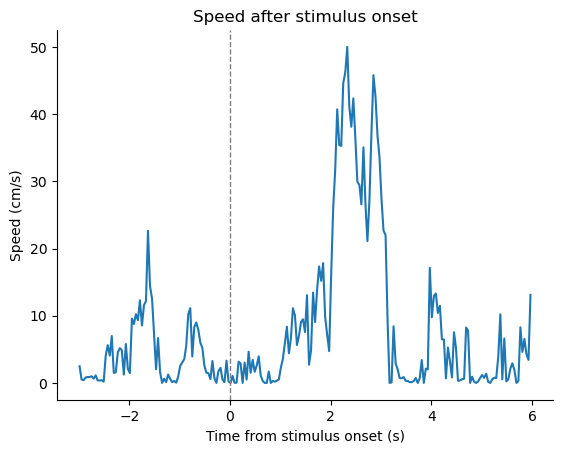

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

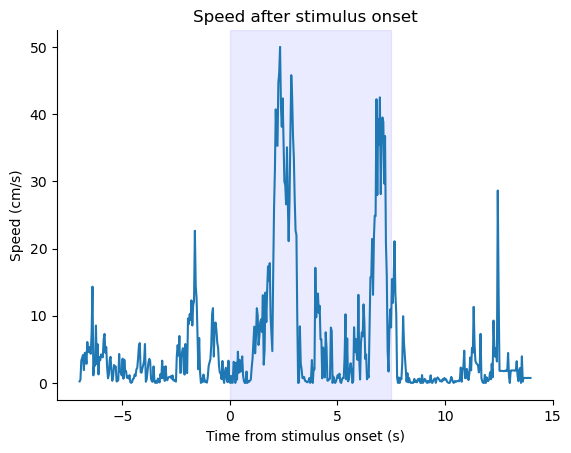

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

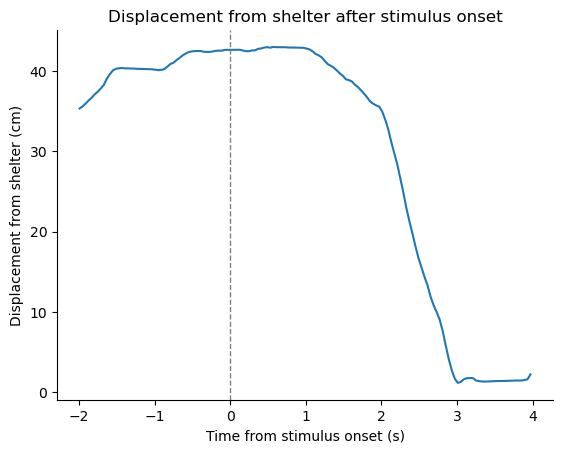

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

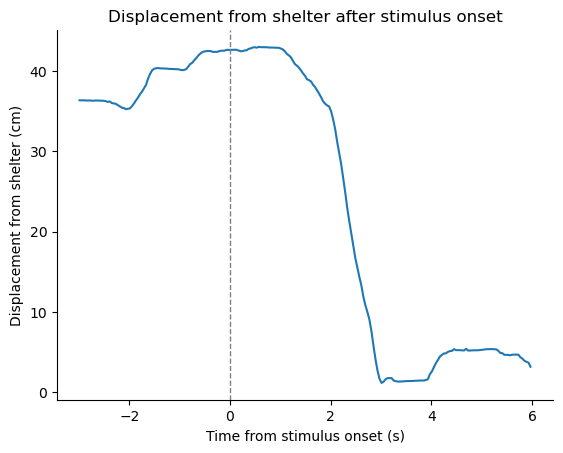

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

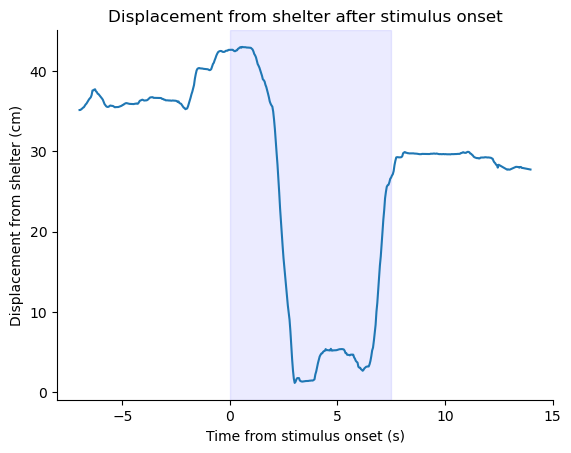

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

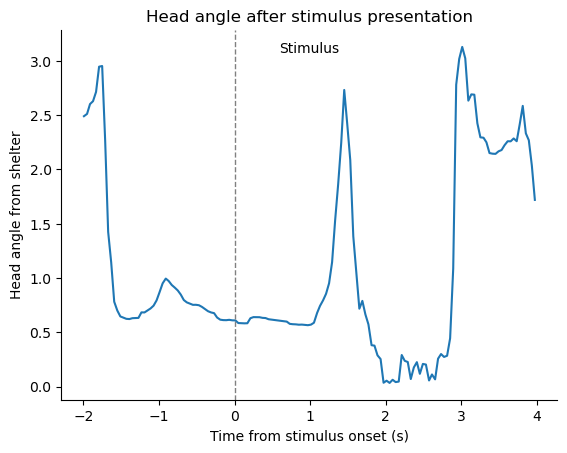

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

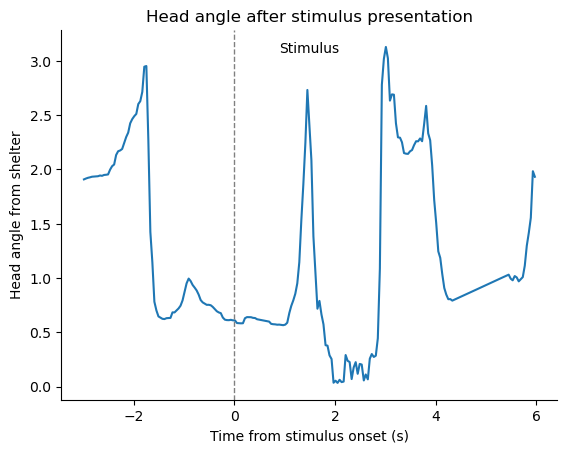

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

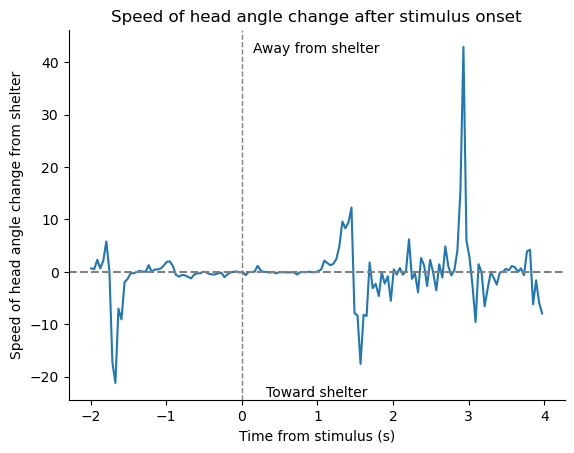

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9497,9497,9497,30.771621,-3.904202,0.000416,31.148122,-7.603292,0.972163,31.869113,-7.317794,...,0.999586,27.524214,-3.109596,0.999601,0.011276,42.607289,0.000000,0.000000,0.610660,-0.023842
9498,9498,9498,30.772183,-3.940487,0.000328,31.238635,-7.584999,0.977376,31.930086,-7.304551,...,0.999417,27.507165,-3.189356,0.999347,0.049497,42.613562,1.049036,0.040095,0.586592,-0.629704
9499,9499,9499,30.772746,-3.976771,0.000684,31.238635,-7.563879,0.979894,31.960008,-7.253837,...,0.999090,27.507165,-3.189356,0.999173,0.089152,42.614001,0.016933,0.000671,0.585040,-0.039137
9500,9500,9500,30.773308,-4.013055,0.000572,31.238635,-7.563879,0.991919,31.960008,-7.253837,...,0.999538,27.507165,-3.189356,0.999533,0.129164,42.612939,0.035039,0.001402,0.583891,-0.028723
9501,9501,9501,30.773870,-4.049339,0.000322,31.230533,-7.563879,0.985438,31.960008,-7.223063,...,0.999229,27.503191,-2.806375,0.999049,0.169177,42.517123,3.149441,0.126019,0.584848,0.023916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,9567,9567,3.355394,24.042782,0.999145,4.709390,23.228670,0.999938,4.130916,22.564525,...,0.999941,10.771232,19.061290,0.999975,2.809804,7.618628,37.150893,1.486482,0.285741,0.277748
9568,9568,9568,2.280470,24.882153,0.997993,3.328398,24.317050,0.999966,2.731598,23.681945,...,0.999938,9.309603,20.106871,0.999989,2.849804,5.816554,45.789318,1.831573,0.446322,4.014538
9569,9569,9569,0.591199,25.971400,0.998642,1.930854,25.362613,0.999968,1.457824,24.727177,...,0.999924,7.881351,21.558700,0.999973,2.890700,4.108236,42.579059,1.741313,1.088623,15.705721
9570,9570,9570,-0.618883,26.554275,0.996661,0.649651,26.198128,0.999990,0.191595,25.428955,...,0.999957,6.474352,22.017775,0.999961,2.930137,2.722395,36.817502,1.451972,2.780108,42.890817


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9497,9497,9497,30.771621,-3.904202,0.000416,31.148122,-7.603292,0.972163,31.869113,-7.317794,...,0.999586,27.524214,-3.109596,0.999601,0.011276,42.607289,0.000000,0.000000,0.610660,-0.023842
9498,9498,9498,30.772183,-3.940487,0.000328,31.238635,-7.584999,0.977376,31.930086,-7.304551,...,0.999417,27.507165,-3.189356,0.999347,0.049497,42.613562,1.049036,0.040095,0.586592,-0.629704
9499,9499,9499,30.772746,-3.976771,0.000684,31.238635,-7.563879,0.979894,31.960008,-7.253837,...,0.999090,27.507165,-3.189356,0.999173,0.089152,42.614001,0.016933,0.000671,0.585040,-0.039137
9500,9500,9500,30.773308,-4.013055,0.000572,31.238635,-7.563879,0.991919,31.960008,-7.253837,...,0.999538,27.507165,-3.189356,0.999533,0.129164,42.612939,0.035039,0.001402,0.583891,-0.028723
9501,9501,9501,30.773870,-4.049339,0.000322,31.230533,-7.563879,0.985438,31.960008,-7.223063,...,0.999229,27.503191,-2.806375,0.999049,0.169177,42.517123,3.149441,0.126019,0.584848,0.023916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9692,9692,9692,-19.148028,19.026086,0.302907,-27.841031,14.228346,0.999937,-27.258337,13.329951,...,0.999987,-22.427723,17.684332,0.999957,7.811315,29.256763,0.000000,0.000000,0.118297,-0.047589
9693,9693,9693,-19.181356,18.982008,0.391025,-27.842966,14.215937,0.999954,-27.273254,13.322639,...,0.999980,-22.427723,17.737794,0.999945,7.851059,29.230287,0.803919,0.031951,0.116691,-0.040402
9694,9694,9694,-19.214685,18.937930,0.343085,-27.842966,14.228346,0.999955,-27.273254,13.330614,...,0.999984,-22.417629,17.737794,0.999944,7.891123,29.230287,0.000000,0.000000,0.113649,-0.075922
9695,9695,9695,-19.248013,18.893852,0.367414,-27.864147,14.228346,0.999943,-27.289691,13.342331,...,0.999984,-22.448741,17.737794,0.999950,7.931084,29.238344,0.743467,0.029710,0.110543,-0.077733


In [34]:

rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


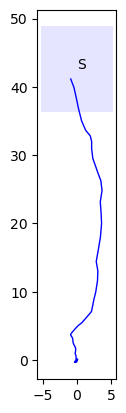

In [35]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


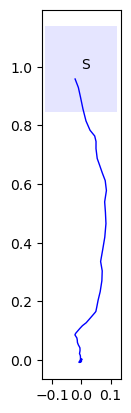

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

